<a href="https://colab.research.google.com/github/AzeemAhmad123/Machine-Learning/blob/main/covid19_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project on Covid-19 Cases Prediction with Python**

In [25]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import plotly.express as px;


In [26]:
from prophet import Prophet;
from sklearn.metrics import r2_score;

In [27]:
plt.style.use("ggplot");

In [28]:
dataset1 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv");
dataset2 = pd.read_csv("CONVENIENT_global_deaths.csv")

# **Data Preparation**

In [29]:
world = pd.DataFrame({"Country": [], "Cases":[]})
world["Country"] = dataset1.iloc[:,1:].columns
cases = []
for i in world["Country"]:
  cases.append(pd.to_numeric(dataset1[i][1:]).sum())
world["Cases"] = cases


In [30]:
country_list = list(world["Country"].values)
num1 = 0
for i in country_list:
  num2 =0
  for j in i :
    if j == "." :
      i = i[:num2]
      country_list[num1]=i
    elif j== "(" :
      i = i[:num2-1]
      country_list[num1]=i
    else:
      num2 +=1
  num1 +=1
world["Country"] = country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent = pd.read_csv("continents2.csv")
continent["name"]= continent["name"].str.upper()

# **Data Visualization**
Now here I will prepare the geographical visualization to visualize the worldwide spread of Covid-19.

In [31]:
world["Cases Range"] = pd.cut(
    world["Cases"],
    [-150000,50000,200000, 800000, 1500000, 15000000],
    labels=["U50K", "50Kto200K","200Kto800K","800Kto1.5M","1.5M+"]
)
alpha=[]
for i in world["Country"].str.upper().values:
  if i == "BRUNEI":
    i = "BRUNEI DARUSSALAM"
  elif i == "US":
    i = "UNITED STATES"
  elif i == "BURMA":
      i = "MYANMAR"
  elif i == "CONGO":
      i = "REPUBLIC OF THE CONGO"
  elif i == "CONGO (KINSHASA)":
      i = "DEMOCRATIC REPUBLIC OF THE CONGO"
  elif i == "COTE D'IVOIRE":
      i = "CÔTE D'IVOIRE"
  elif i == "CZECHIA":
      i = "CZECH REPUBLIC"
  elif i == "KOREA, NORTH":
      i = "NORTH KOREA"
  elif i == "KOREA, SOUTH":
      i = "SOUTH KOREA"
  elif i == "TAIWAN*":
      i = "TAIWAN"
  if len(continent[continent["name"]== i]["alpha-3"].values)==0:
    alpha.append(np.nan)
  else:
    alpha.append(continent[continent["name"]== i]["alpha-3"].values[0])

world["Alpha3"] = alpha

In [32]:
fig = px.choropleth(world.dropna(),
                    locations="Alpha3",
                    color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white", "khaki", "yellow", "orange", "red"])
fig.update_layout(margin={"r":0 , "t":0, "l":0,"b":0})
fig.show()

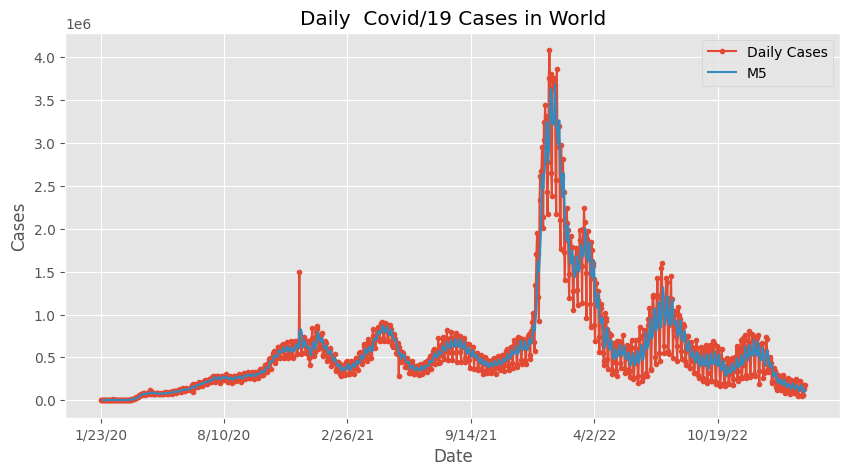

In [33]:
count = []
for i in range(1, len(dataset1)):
  count.append(sum(pd.to_numeric(dataset1.iloc[i,1:].values)))
df = pd.DataFrame()
df["Date"] = dataset1["Country/Region"][1:]
df["Cases"] = count
df = df.set_index("Date")

count = []
for i in range(1 , len(dataset2)):
  count.append(sum(pd.to_numeric(dataset2.iloc[i,1:].values)))
df["Deaths"] = count

df.Cases.plot(title = "Daily  Covid/19 Cases in World" , marker = ".", figsize=(10,5), label = "Daily Cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label = "M5")
plt.ylabel("Cases")
plt.legend()
plt.show()

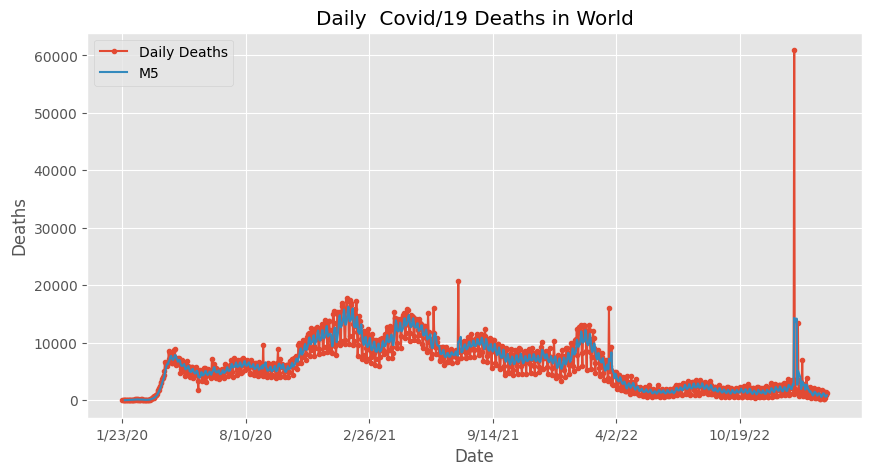

In [34]:
df.Deaths.plot(title = "Daily  Covid/19 Deaths in World" , marker = ".", figsize=(10,5), label = "Daily Deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label = "M5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# **`Covid-19 Cases Prediction with Python for Next 30 Days`**

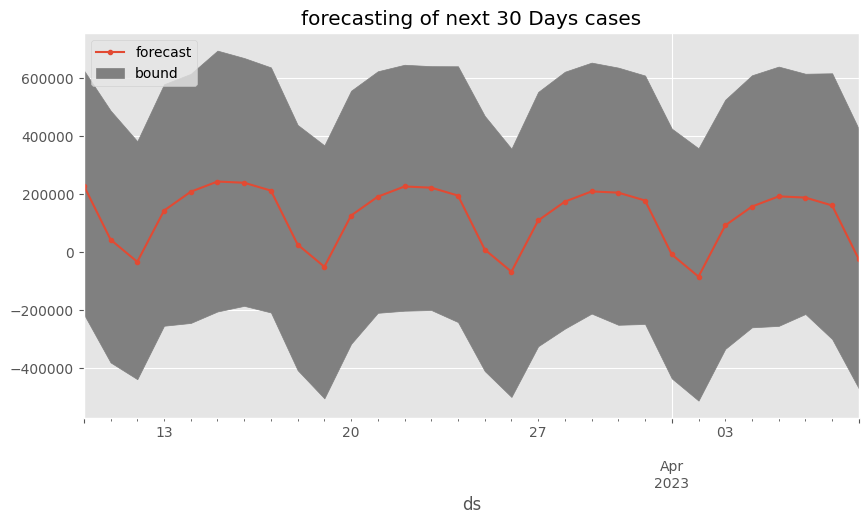

In [38]:
class prophet(object) :
  def fit(self, data):
    self.data = data
    self.model = Prophet(weekly_seasonality=True , daily_seasonality=False, yearly_seasonality=False)
    self.model.fit(self.data)

  def forecast(self, periods , freq):
    self.future = self.model.make_future_dataframe(periods = periods , freq = freq)
    self.df_forecast= self.model.predict(self.future)

  def plot(self, xlabel = "years" , ylabel = "values"):
    self.model.plot(self.df_forecast , xlabel = xlabel , ylabel = ylabel , figsize=(9,4))
    self.model.plot.components(self.df_forecast , figsize(9,6))

  def R2(self):
    return r2_score(self.data.y , self.df_forecast.yhat[:len(df)])

import logging
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)


df_fb = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"]= pd.to_datetime(df.index)
df_fb["y"]= df.iloc[:,0].values

model = prophet()
model.fit(df_fb)
model.forecast(30 , "D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower", "yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis = 1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x = forecast.index, y1= forecast["yhat_lower"], y2= forecast["yhat_upper"],color = "gray")
plt.legend(["forecast", "bound"],loc = "upper left")
plt.title("forecasting of next 30 Days cases")
plt.show()
